# Flatline exploration 

## Material: PET-G Discodip

## Date: 01-10-2022 11:45-11:58

#### Note: Met rubber, hoger wiel en laatst met topwiel

10:09-10:19 eerste flatline met los rubber en hooog wiel

10:34-10:40 tweede flatline met rubuer strak

11:27-11:40 derde flatline met extra topwiel 

#### na lunch times:

15:38-15:50 10 graad roller. Minder druk op de hoogte. 

16:37:16:48 meer druk op hoogte, en meer slack op rubber midden. 



In [ ]:
# imports
# system related
import sys
import subprocess

# basics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# import itertools
# from datetime import datetime, time

# ml related
import sklearn as sk
# import torch
# import torch.nn as nn

# import scripts and functions
from functions import *


print('imports succesfull')

imports succesfull


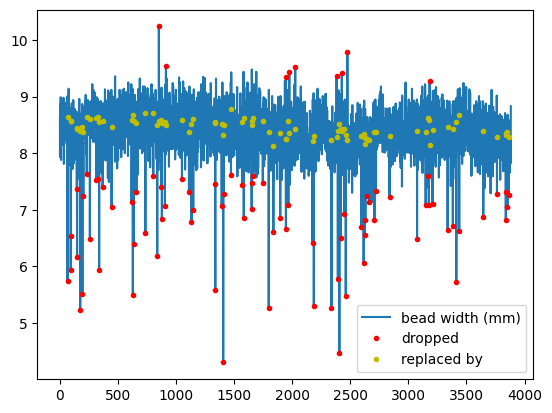

median filt ACTIVATED
import and preprocessing data succesfull


In [ ]:
# Defining import variables, _s stands for small
loc_s = '../data/flat_petg_06-10_voor_lunch.csv'
start_s = '2022-10-06 11:27:00.000'
end_s = '2022-10-06 11:40:00.000'

# import, filter, outlier replacement and median filtering on bead_width (mm)
df_s = import_csv_filt(loc_s, start_s, end_s, plot_outliers=True, outlier_thres=1)

df_s_no_filt = import_csv_filt(loc_s, start_s, end_s, median_filt=False, outlier_thres=1.5)

print('import and preprocessing data succesfull')

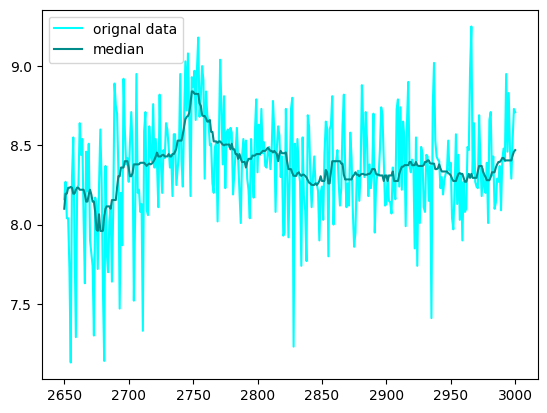

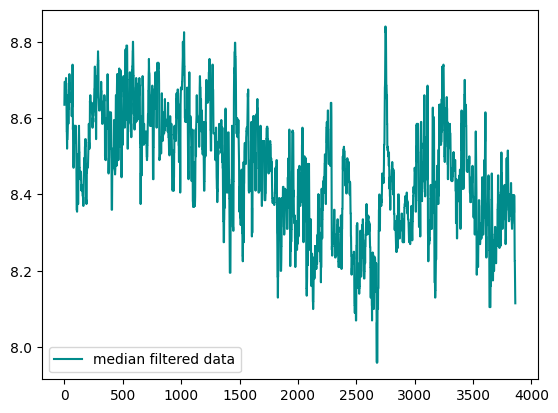

In [ ]:
filter_length = 20
head_tails = int(filter_length/2)

bead_gauss = df_s['bead_width (mm)'].rolling(window=filter_length, win_type='gaussian', center=True).mean(std=5)
bead_median = df_s['bead_width (mm)'].rolling(window=filter_length, center=True).median()


plt.plot(df_s_no_filt.loc[2650:3000, 'bead_width (mm)'], 'cyan', label='orignal data')
plt.plot(df_s.loc[2650:3000, 'bead_width (mm)'], 'darkcyan', label='median')
plt.legend()
plt.show()

plt.plot(df_s.loc[:, 'bead_width (mm)'], 'darkcyan', label='median filtered data')
plt.legend()
plt.show()

C:\Users\ceadg\AppData\Local\Temp\ipykernel_3876\3407494559.py:13: RuntimeWarning: divide by zero encountered in divide
  freq = T/n #  /T  Changed to seconds instead of hz
C:\Users\ceadg\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


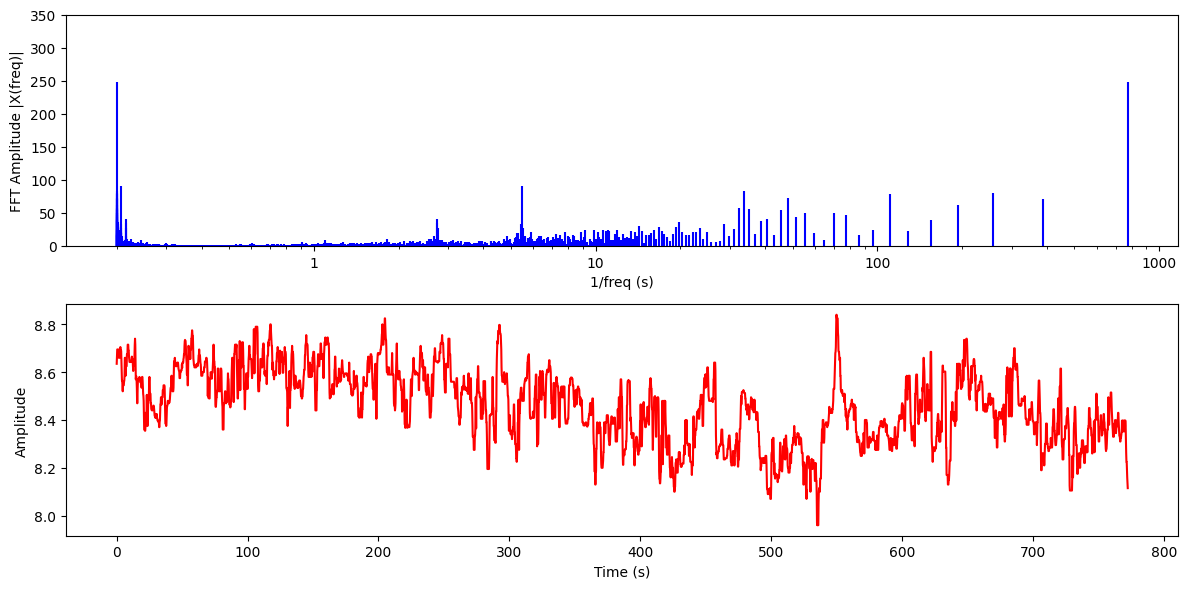

In [ ]:
from numpy.fft import fft, ifft
from matplotlib.ticker import ScalarFormatter


X = fft(df_s.loc[:, 'bead_width (mm)'])
N = len(X)
sr = 5
ts = 1.0/sr
t = np.arange(0,0.2*N,ts)

n = np.arange(N)
T = N/sr
freq = T/n #  /T  Changed to seconds instead of hz

fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(2, 1, 1)
plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('1/freq (s)') # instead of plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xscale('log',base=10)
plt.ylim(0, 350)

ax.xaxis.set_major_formatter(ScalarFormatter())

ax = fig.add_subplot(2, 1, 2)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

#### 

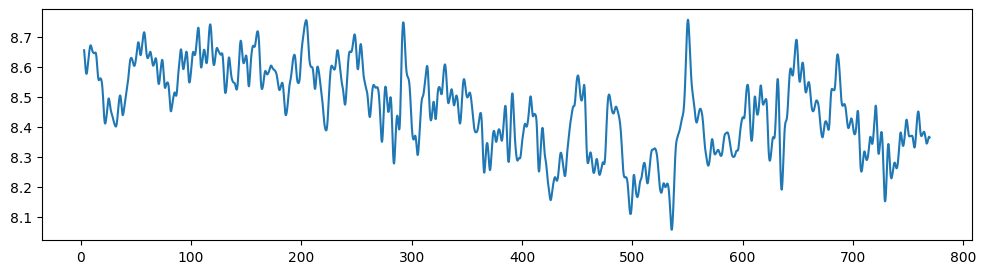

In [ ]:
fig = plt.figure(figsize=(12,3))

plt.plot(t, df_s.loc[:, 'bead_width (mm)'].rolling(window=30, win_type='gaussian', center=True).mean(std=5))


### TRYING A LOW PASS FILTER

<function matplotlib.pyplot.show(close=None, block=None)>

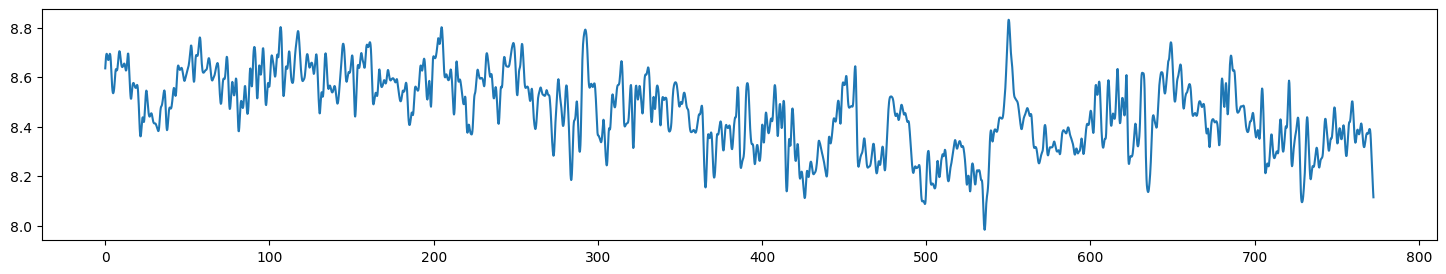

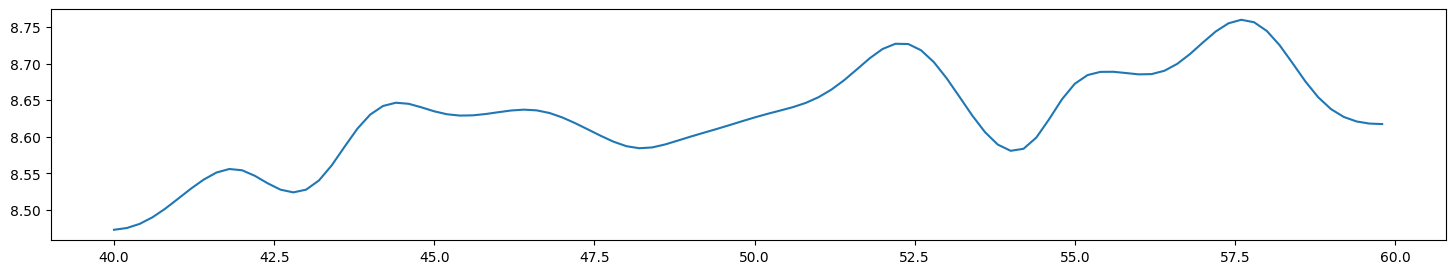

In [7]:
from scipy.signal import butter,filtfilt

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Filter requirements.
T = 5.0         # Sample Period
fs = 5.0       # sample rate, Hz
cutoff = .5    # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = N # total number of samples

data = df_s.loc[:, 'bead_width (mm)']

y = butter_lowpass_filter(data, cutoff, fs, order)

fig = plt.figure(figsize=(18,3))
plt.plot(t, y)
plt.show

fig = plt.figure(figsize=(18,3))
plt.plot(t[200:300], y[200:300])
plt.show




